In [1]:
"""
AGN구분(strong vs. weak - [OIII], seyfert vs. LINERs), sigma5 계산, binning 얇게(redshift에 따라서) AGN 비율(AGN fraction) 변화 있는지
Cluster environment vs. Field environment
"""
print("Binning")

Binning


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from astropy.cosmology import WMAP9 as cosmo

In [10]:
d = np.genfromtxt('GU2_TP_Test2.csv', dtype='str', delimiter=',')
print(d[0])
dtype = [((d[0][i]), '<f8') for i in range(len(d[0]))]
data0 = np.genfromtxt('GU2_TP_Test2.csv', dtype=dtype, delimiter=',', skip_header=1)

['specObjID' 'z' 'z_err' 'ra' 'dec' 'petroMag_g' 'petroMag_r' 'petroMag_i'
 'h_alpha_flux' 'h_alpha_flux_err' 'h_beta_flux' 'h_beta_flux_err'
 'oiii_5007_flux' 'oiii_5007_flux_err' 'oi_6300_flux' 'oi_6300_flux_err'
 'nii_6584_flux' 'nii_6584_flux_err' 'sii_6717_flux' 'sii_6717_flux_err'
 'sii_6731_flux' 'sii_6731_flux_err' 'h_delta_flux' 'h_delta_flux_err']


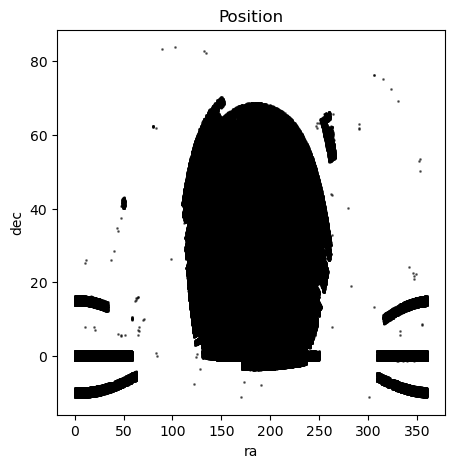

In [14]:
ra0 = data0['ra']
dec0 = data0['dec']

plt.figure(figsize=(5,5))
plt.scatter(ra0, dec0, c='k', s=1, alpha=0.5)
plt.xlabel('ra')
plt.ylabel('dec')
plt.title('Position')
plt.show()

C:\Users\seohyun\AppData\Local\Temp\ipykernel_4688\2209693103.py:4: RuntimeWarning: invalid value encountered in log10
  Mr0 = r_mag0 - 5.0 * np.log10(dL0) - 25.0


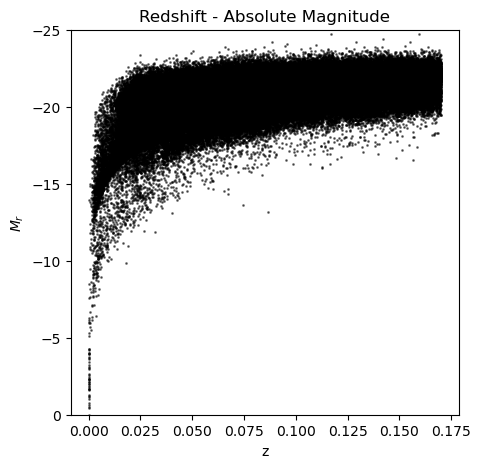

In [16]:
z0 = data0['z']
r_mag0 = data0['petroMag_r']
dL0 = cosmo.luminosity_distance(z0).value
Mr0 = r_mag0 - 5.0 * np.log10(dL0) - 25.0

plt.figure(figsize=(5,5))
plt.scatter(z0, Mr0, c='k', s=1, alpha=0.5)
plt.ylim(0, -25)
plt.xlabel('z')
plt.ylabel('$M_r$')
plt.title('Redshift - Absolute Magnitude')
plt.show()

In [19]:
print(len(data0['specObjID']))
print(np.where(dL0 <= 0)[0])
print(dL0[np.where(dL0 <= 0)[0]])

441620
[  3644  24448  69577  78203  86452 110262 117009 127743 137640 141437
 147042 152577 153367 163047 163212 167026 167190 175760 179749 187327
 199691 219409 221797 230821 238294 238651 242970 250091 253939 259808
 279970 283049 287840 299861 303084 305033 306636 307100 307122 311242
 316512 316702 318638 319970 321646 322073 326058 340432 347242 352428
 368309 374261 385165 385259 385931 389503 391834 409064 409153 422617
 424967 425109 428711]
[-0.13610012 -3.41139556 -0.33587392 -0.37804621 -0.96462733 -1.56887343
 -1.5684183  -1.20936277 -0.0943184  -0.78735685 -0.04458014 -0.16092914
 -0.23554398 -2.00087945 -0.27390608 -0.06773003 -0.01135604 -0.31982292
 -2.38828563 -1.8321354  -0.64047846 -0.09616454 -1.78814346 -0.10268353
 -0.79018616 -0.21831097 -1.89001431 -0.54319657 -0.03383465 -0.12875677
 -0.05011938 -0.39420289 -1.63098544 -0.11812149 -0.07559397 -2.35296504
 -0.8811044  -2.21849455 -2.67397113 -0.25837222 -0.22783764 -1.18224749
 -0.22943888 -0.10477227 -0.59160

In [30]:
# criteria
cri_mr = data0['petroMag_r'] < 17.77

z0 = data0['z']
dL0 = cosmo.luminosity_distance(z0).value
Mr0 = data0['petroMag_r'] - 5 * np.log10(dL0) - 25
Mr_limit = 17.77 - 5 * np.log10(np.max(dL0)) - 25
cri_Mr = Mr0 < Mr_limit

cri_dL = dL0 > 0

cri = cri_mr & cri_Mr & cri_dL
data = data0[cri]
print(len(data0['specObjID']), 'to', len(data['specObjID']))
print(f"Mr limit : {Mr_limit}")

441620 to 68267
Mr limit : -21.819396214977044


C:\Users\seohyun\AppData\Local\Temp\ipykernel_4688\2301063153.py:6: RuntimeWarning: invalid value encountered in log10
  Mr0 = data0['petroMag_r'] - 5 * np.log10(dL0) - 25


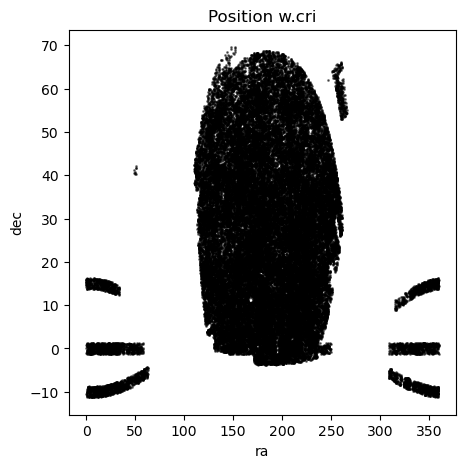

In [32]:
ra = data['ra']
dec = data['dec']

plt.figure(figsize=(5,5))
plt.scatter(ra, dec, c='k', s=1, alpha=0.5)
plt.xlabel('ra')
plt.ylabel('dec')
plt.title('Position w.cri')
plt.show()

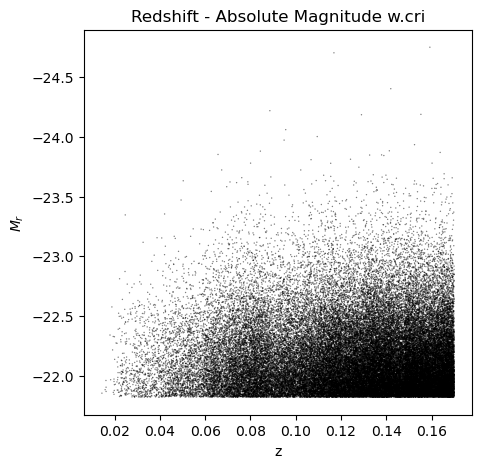

In [31]:
z = data['z']
r_mag = data['petroMag_r']
dL = cosmo.luminosity_distance(z).value
Mr = r_mag - 5.0 * np.log10(dL) - 25.0

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(z, Mr, c='k', s=1, alpha=0.5, edgecolor='None')
ax.invert_yaxis()
ax.set_xlabel('z')
ax.set_ylabel('$M_r$')
ax.set_title('Redshift - Absolute Magnitude w.cri')
plt.show()

In [33]:
# 'h_alpha_flux' 'h_beta_flux' 'oiii_5007_flux' 'oi_6300_flux' 'nii_6584_flux' 'sii_6717_flux' 'sii_6731_flux' 'h_delta_flux'

oiii = data['oiii_5007_flux']
nii = data['nii_6584_flux']
siiw = data['sii_6717_flux']
siis = data['sii_6731_flux']
oi = data['oi_6300_flux']
ha = data['h_alpha_flux']
hb = data['h_beta_flux']
hd = data['h_delta_flux']

In [34]:
cri_mon1 = oiii / hb > 0
cri_mon2 = nii / ha > 0
cri_mon = cri_mon1 & cri_mon2

print(len(oiii), len(oiii[cri_mon]))

68267 68267


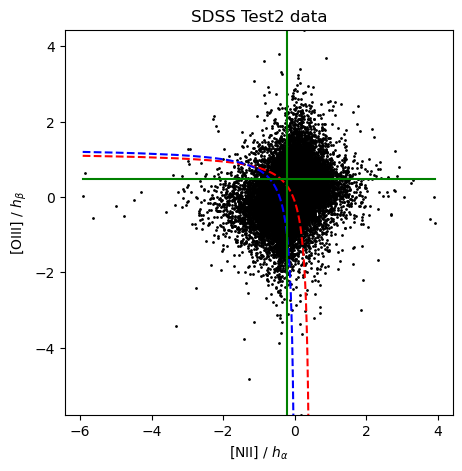

In [37]:
oiii_hb = np.log10(oiii[cri_mon] / hb[cri_mon])
nii_ha = np.log10(nii[cri_mon] / ha[cri_mon])

xline_nii_ha = nii_ha[nii_ha < 0.47]
yline_nii_ha = 0.61 / (nii_ha[nii_ha < 0.47] - 0.47) + 1.19
s = xline_nii_ha.argsort()
x_nii_ha = xline_nii_ha[s]
y_nii_ha = yline_nii_ha[s]

xline2_nii_ha = nii_ha[nii_ha < 0.05]
yline2_nii_ha = 0.61 / (nii_ha[nii_ha < 0.05] - 0.05) + 1.3
s = xline2_nii_ha.argsort()
x2_nii_ha = xline2_nii_ha[s]
y2_nii_ha = yline2_nii_ha[s]

plt.figure(figsize=(5,5))
plt.scatter(nii_ha, oiii_hb, c='k', s=1)
plt.plot(x_nii_ha, y_nii_ha, 'r--')
plt.plot(x2_nii_ha, y2_nii_ha, 'b--')
plt.plot([np.log10(0.6), np.log10(0.6)], [min(oiii_hb), max(oiii_hb)], color='g')
plt.plot([min(nii_ha), max(nii_ha)], [np.log10(3), np.log10(3)], color='g')
plt.ylim(min(oiii_hb), max(oiii_hb))

plt.xlabel(r'[NII] / $h_{\alpha}$')
plt.ylabel(r'[OIII] / $h_{\beta}$')
plt.title('SDSS Test2 data')
plt.show()